# Practical example

##### Data from house prices data set assembled and published by Dean De Cock. It's a set of 2,430 observations with 82 attributes each. The goal is to use the first 80% to make a model and predict the final 20%.

## Importing the relevant libraries

In [639]:
# For this practical example we will need the following libraries and modules
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()

#Apply to fix the statsmodels library
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)

from sklearn.linear_model import LinearRegression

## Loading the raw data

In [640]:
# Load the data from a .csv in the same folder
raw_data = pd.read_csv('house_prices.csv')


# Let's explore the top 5 rows of the df
raw_data.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,484,528275070,60,RL,nan,8795,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,4,2009,WD,Normal,236000
1,2586,535305120,20,RL,75.00,10170,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,155000
2,2289,923228250,160,RM,21.00,2001,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,1,2007,WD,Normal,75000
3,142,535152150,20,RL,70.00,10552,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,165500
4,2042,903475060,190,RM,60.00,10120,Pave,NaN,IR1,Bnk,...,0,NaN,MnPrv,NaN,0,1,2007,WD,Normal,122000


In [641]:
raw_data.columns

Index(['Order', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
      

## Preprocessing

### Exploring the descriptive statistics of the variables

In [642]:
# Descriptive statistics are very useful for initial exploration of the variables
# By default, only descriptives for the numerical variables are shown
# To include the categorical ones, you should specify this with an argument
raw_data.describe(include='all')

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
count,2430.00,2430.00,2430.00,2430,2010.00,2430.00,2430,163,2430,2430,...,2430.00,12,489,90,2430.00,2430.00,2430.00,2430,2430,2430.00
unique,nan,nan,nan,7,nan,nan,2,2,4,4,...,nan,4,4,5,nan,nan,nan,10,6,nan
top,nan,nan,nan,RL,nan,nan,Pave,Grvl,Reg,Lvl,...,nan,Ex,MnPrv,Shed,nan,nan,nan,WD,Normal,nan
freq,nan,nan,nan,1894,nan,nan,2419,104,1514,2176,...,nan,4,288,80,nan,nan,nan,2116,2022,nan
mean,1469.48,714937485.50,57.09,NaN,69.20,10243.56,NaN,NaN,NaN,NaN,...,2.40,NaN,NaN,NaN,56.18,6.21,2007.78,NaN,NaN,180199.69
std,843.24,188733939.11,42.90,NaN,23.49,8353.93,NaN,NaN,NaN,NaN,...,36.11,NaN,NaN,NaN,616.66,2.72,1.31,NaN,NaN,79607.47
min,1.00,526301100.00,20.00,NaN,21.00,1470.00,NaN,NaN,NaN,NaN,...,0.00,NaN,NaN,NaN,0.00,1.00,2006.00,NaN,NaN,12789.00
25%,749.25,528477042.50,20.00,NaN,58.00,7482.00,NaN,NaN,NaN,NaN,...,0.00,NaN,NaN,NaN,0.00,4.00,2007.00,NaN,NaN,129000.00
50%,1470.50,535454055.00,50.00,NaN,68.00,9500.00,NaN,NaN,NaN,NaN,...,0.00,NaN,NaN,NaN,0.00,6.00,2008.00,NaN,NaN,160000.00
75%,2193.50,907135240.00,70.00,NaN,80.00,11604.50,NaN,NaN,NaN,NaN,...,0.00,NaN,NaN,NaN,0.00,8.00,2009.00,NaN,NaN,213099.75


In [643]:
#Droping some rows fpr this analysis and keeping only the relevant ones

data = raw_data.drop(raw_data.columns.difference(['MS SubClass', 'MS Zoning', 'Lot Area', 'Street', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Yr Sold', 'Sale Type',
       'Sale Condition', 'SalePrice']), axis = 1,)

In [644]:
#Checking the data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2430 entries, 0 to 2429
Data columns (total 16 columns):
MS SubClass       2430 non-null int64
MS Zoning         2430 non-null object
Lot Area          2430 non-null int64
Street            2430 non-null object
Condition 1       2430 non-null object
Condition 2       2430 non-null object
Bldg Type         2430 non-null object
House Style       2430 non-null object
Overall Qual      2430 non-null int64
Overall Cond      2430 non-null int64
Year Built        2430 non-null int64
Year Remod/Add    2430 non-null int64
Yr Sold           2430 non-null int64
Sale Type         2430 non-null object
Sale Condition    2430 non-null object
SalePrice         2430 non-null int64
dtypes: int64(8), object(8)
memory usage: 303.8+ KB


In [645]:
#Changing some Data types

data['Overall Cond'] = data['Overall Cond'].astype(object).astype(object)
data['Overall Qual'] = data['Overall Qual'].astype(object).astype(object)
data['Yr Sold'] = data['Yr Sold'].astype(object).astype(object)
data['MS SubClass'] = data['MS SubClass'].astype(object).astype(object)
data['MS Zoning'] = data['MS Zoning'].astype(object).astype(object)

In [646]:
data.describe(include='all')

,MS SubClass,MS Zoning,Lot Area,Street,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Yr Sold,Sale Type,Sale Condition,SalePrice
count,2430.00,2430,2430.00,2430,2430,2430,2430,2430,2430.00,2430.00,2430.00,2430.00,2430.00,2430,2430,2430.00
unique,16.00,7,nan,2,9,8,5,8,10.00,9.00,nan,nan,5.00,10,6,nan
top,20.00,RL,nan,Pave,Norm,Norm,1Fam,1Story,5.00,5.00,nan,nan,2007.00,WD,Normal,nan
freq,912.00,1894,nan,2419,2086,2403,2016,1244,690.00,1367.00,nan,nan,584.00,2116,2022,nan
mean,nan,NaN,10243.56,NaN,NaN,NaN,NaN,NaN,nan,nan,1971.17,1984.24,nan,NaN,NaN,180199.69
std,nan,NaN,8353.93,NaN,NaN,NaN,NaN,NaN,nan,nan,30.21,20.75,nan,NaN,NaN,79607.47
min,nan,NaN,1470.00,NaN,NaN,NaN,NaN,NaN,nan,nan,1875.00,1950.00,nan,NaN,NaN,12789.00
25%,nan,NaN,7482.00,NaN,NaN,NaN,NaN,NaN,nan,nan,1954.00,1966.00,nan,NaN,NaN,129000.00
50%,nan,NaN,9500.00,NaN,NaN,NaN,NaN,NaN,nan,nan,1973.00,1993.00,nan,NaN,NaN,160000.00
75%,nan,NaN,11604.50,NaN,NaN,NaN,NaN,NaN,nan,nan,2000.00,2003.00,nan,NaN,NaN,213099.75


### Dealing with missing values

In [647]:
# data.isnull() # shows a df with the information whether a data point is null 
# Since True = the data point is missing, while False = the data point is not missing, we can sum them
# This will give us the total number of missing values feature-wise
data.isnull().sum()

MS SubClass       0
MS Zoning         0
Lot Area          0
Street            0
Condition 1       0
Condition 2       0
Bldg Type         0
House Style       0
Overall Qual      0
Overall Cond      0
Year Built        0
Year Remod/Add    0
Yr Sold           0
Sale Type         0
Sale Condition    0
SalePrice         0
dtype: int64

In [648]:
# drop all missing values since they are less than 5% of the data, it is okay
data_no_mv = data.dropna(axis=0)

In [649]:
# check the descriptives without the missing values
data_no_mv.describe(include='all')

,MS SubClass,MS Zoning,Lot Area,Street,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Yr Sold,Sale Type,Sale Condition,SalePrice
count,2430.00,2430,2430.00,2430,2430,2430,2430,2430,2430.00,2430.00,2430.00,2430.00,2430.00,2430,2430,2430.00
unique,16.00,7,nan,2,9,8,5,8,10.00,9.00,nan,nan,5.00,10,6,nan
top,20.00,RL,nan,Pave,Norm,Norm,1Fam,1Story,5.00,5.00,nan,nan,2007.00,WD,Normal,nan
freq,912.00,1894,nan,2419,2086,2403,2016,1244,690.00,1367.00,nan,nan,584.00,2116,2022,nan
mean,nan,NaN,10243.56,NaN,NaN,NaN,NaN,NaN,nan,nan,1971.17,1984.24,nan,NaN,NaN,180199.69
std,nan,NaN,8353.93,NaN,NaN,NaN,NaN,NaN,nan,nan,30.21,20.75,nan,NaN,NaN,79607.47
min,nan,NaN,1470.00,NaN,NaN,NaN,NaN,NaN,nan,nan,1875.00,1950.00,nan,NaN,NaN,12789.00
25%,nan,NaN,7482.00,NaN,NaN,NaN,NaN,NaN,nan,nan,1954.00,1966.00,nan,NaN,NaN,129000.00
50%,nan,NaN,9500.00,NaN,NaN,NaN,NaN,NaN,nan,nan,1973.00,1993.00,nan,NaN,NaN,160000.00
75%,nan,NaN,11604.50,NaN,NaN,NaN,NaN,NaN,nan,nan,2000.00,2003.00,nan,NaN,NaN,213099.75


In [650]:
#check the cloumn names
data_no_mv.columns

Index(['MS SubClass', 'MS Zoning', 'Lot Area', 'Street', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Yr Sold', 'Sale Type',
       'Sale Condition', 'SalePrice'],
      dtype='object')

### Exploring the PDFs

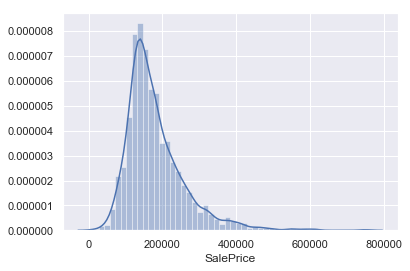

In [651]:
# Data exploration to display the probability distribution function (PDF) of a variable
# The PDF will show us how that variable is distributed 
# This makes it very easy to spot anomalies, such as outliers
# The PDF is often the basis on which we decide whether we want to transform a feature
sns.distplot(data_no_mv['SalePrice'])

### Dealing with outliers

In [652]:
# Obviously there are some outliers present 

# Outliers are a great issue for ordinary least squares (OLS), thus we must deal with them in some way
# It may be a useful exercise to try training a model without removing the outliers

# Let's declare a variable that will be equal to the 99th percentile of the 'SalePrice' variable
q = data_no_mv['SalePrice'].quantile(0.99)
# Then we can create a new df, with the condition that all prices must be below the 99 percentile of 'SalePrice'
data_1 = data_no_mv[data_no_mv['SalePrice']<q]
# In this way we have essentially removed the top 1% of the data about 'SalePrice'
data_1.describe(include='all')

,MS SubClass,MS Zoning,Lot Area,Street,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Yr Sold,Sale Type,Sale Condition,SalePrice
count,2405.00,2405,2405.00,2405,2405,2405,2405,2405,2405.00,2405.00,2405.00,2405.00,2405.00,2405,2405,2405.00
unique,16.00,7,nan,2,9,8,5,8,10.00,9.00,nan,nan,5.00,10,6,nan
top,20.00,RL,nan,Pave,Norm,Norm,1Fam,1Story,5.00,5.00,nan,nan,2007.00,WD,Normal,nan
freq,898.00,1870,nan,2394,2066,2380,1991,1230,690.00,1344.00,nan,nan,577.00,2102,2011,nan
mean,nan,NaN,10174.47,NaN,NaN,NaN,NaN,NaN,nan,nan,1970.87,1984.03,nan,NaN,NaN,176423.68
std,nan,NaN,8332.75,NaN,NaN,NaN,NaN,NaN,nan,nan,30.13,20.75,nan,NaN,NaN,70362.77
min,nan,NaN,1470.00,NaN,NaN,NaN,NaN,NaN,nan,nan,1875.00,1950.00,nan,NaN,NaN,12789.00
25%,nan,NaN,7425.00,NaN,NaN,NaN,NaN,NaN,nan,nan,1953.00,1965.00,nan,NaN,NaN,128950.00
50%,nan,NaN,9453.00,NaN,NaN,NaN,NaN,NaN,nan,nan,1972.00,1992.00,nan,NaN,NaN,160000.00
75%,nan,NaN,11500.00,NaN,NaN,NaN,NaN,NaN,nan,nan,2000.00,2003.00,nan,NaN,NaN,211000.00


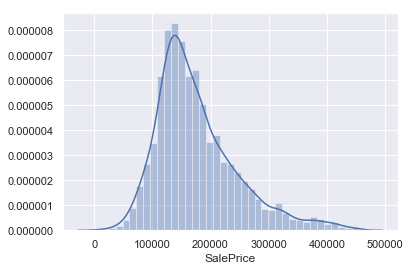

In [653]:
# We can check the PDF once again to ensure that the result is still distributed in the same way overall
# however, there are much fewer outliers
sns.distplot(data_1['SalePrice'])

In [654]:
data_no_mv.columns

Index(['MS SubClass', 'MS Zoning', 'Lot Area', 'Street', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Yr Sold', 'Sale Type',
       'Sale Condition', 'SalePrice'],
      dtype='object')

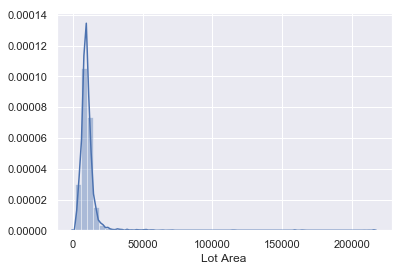

In [655]:
# We can treat the other numerical variables in a similar way
sns.distplot(data_no_mv['Lot Area'])

In [656]:
q = data_1['Lot Area'].quantile(0.97)
data_2 = data_1[data_1['Lot Area']<q]

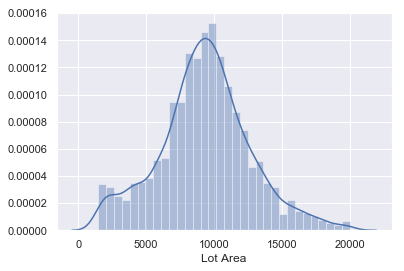

In [657]:
# This plot looks kind of normal, doesn't it?
sns.distplot(data_2['Lot Area'])

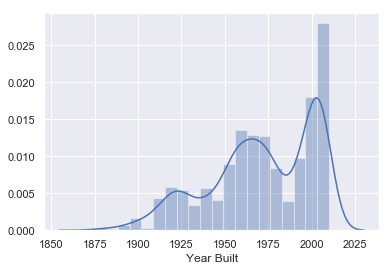

In [658]:
# We can treat the other numerical variables in a similar way
sns.distplot(data_no_mv['Year Built'])

In [659]:
q = data_2['Year Built'].quantile(0.05)
data_3 = data_2[data_2['Year Built']>q]

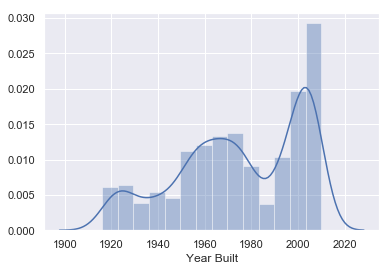

In [660]:
# This plot looks kind of normal, doesn't it?
sns.distplot(data_3['Year Built'])

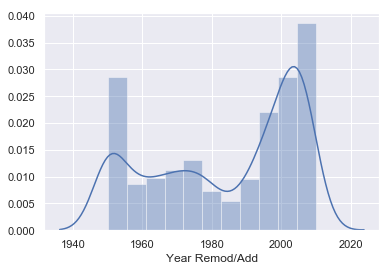

In [661]:
# We can treat the other numerical variables in a similar way
sns.distplot(data_no_mv['Year Remod/Add'])

In [662]:
q = data_3['Year Remod/Add'].quantile(0.05)
data_4 = data_3[data_3['Year Remod/Add']>q]

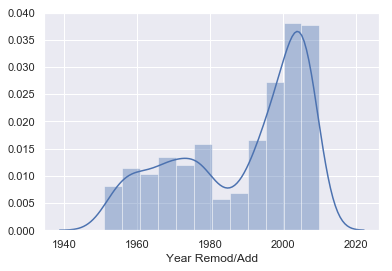

In [663]:
# This plot looks kind of normal, doesn't it?
sns.distplot(data_4['Year Remod/Add'])

In [664]:
# When we remove observations, the original indexes are preserved
# If we remove observations with indexes 2 and 3, the indexes will go as: 0,1,4,5,6
# That's very problematic as we tend to forget about it (later you will see an example of such a problem)

# Finally, once we reset the index, a new column will be created containing the old index (just in case)
# We won't be needing it, thus 'drop=True' to completely forget about it
data_cleaned = data_4.reset_index(drop=True)

In [665]:
# Let's see what's left
data_cleaned.describe(include='all')

,MS SubClass,MS Zoning,Lot Area,Street,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Yr Sold,Sale Type,Sale Condition,SalePrice
count,1969.00,1969,1969.00,1969,1969,1969,1969,1969,1969.00,1969.00,1969.00,1969.00,1969.00,1969,1969,1969.00
unique,16.00,6,nan,2,9,8,5,8,10.00,9.00,nan,nan,5.00,9,6,nan
top,20.00,RL,nan,Pave,Norm,Norm,1Fam,1Story,5.00,5.00,nan,nan,2007.00,WD,Normal,nan
freq,839.00,1642,nan,1966,1736,1956,1607,1087,534.00,1228.00,nan,nan,482.00,1708,1651,nan
mean,nan,NaN,9472.11,NaN,NaN,NaN,NaN,NaN,nan,nan,1979.81,1988.74,nan,NaN,NaN,185882.52
std,nan,NaN,3457.59,NaN,NaN,NaN,NaN,NaN,nan,nan,23.35,17.55,nan,NaN,NaN,69001.98
min,nan,NaN,1470.00,NaN,NaN,NaN,NaN,NaN,nan,nan,1916.00,1951.00,nan,NaN,NaN,12789.00
25%,nan,NaN,7685.00,NaN,NaN,NaN,NaN,NaN,nan,nan,1962.00,1973.00,nan,NaN,NaN,137000.00
50%,nan,NaN,9571.00,NaN,NaN,NaN,NaN,NaN,nan,nan,1979.00,1996.00,nan,NaN,NaN,170000.00
75%,nan,NaN,11500.00,NaN,NaN,NaN,NaN,NaN,nan,nan,2003.00,2004.00,nan,NaN,NaN,219210.00


## Checking the OLS assumptions

In [666]:
data_cleaned.columns

Index(['MS SubClass', 'MS Zoning', 'Lot Area', 'Street', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Yr Sold', 'Sale Type',
       'Sale Condition', 'SalePrice'],
      dtype='object')

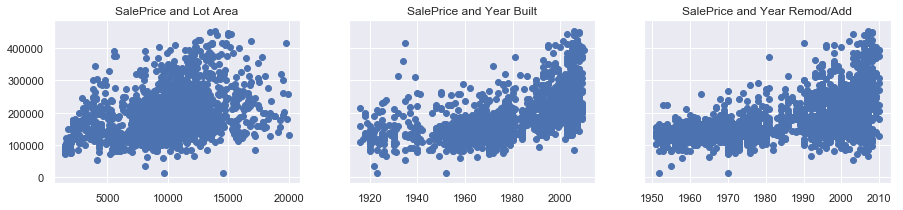

In [667]:
# Since SalePrice is the 'y' axis of all the plots, it made sense to plot them side-by-side (so we can compare them)
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3)) #sharey -> share 'SalePrice' as y
ax1.scatter(data_cleaned['Lot Area'],data_cleaned['SalePrice'])
ax1.set_title('SalePrice and Lot Area')
ax2.scatter(data_cleaned['Year Built'],data_cleaned['SalePrice'])
ax2.set_title('SalePrice and Year Built')
ax3.scatter(data_cleaned['Year Remod/Add'],data_cleaned['SalePrice'])
ax3.set_title('SalePrice and Year Remod/Add')


plt.show()

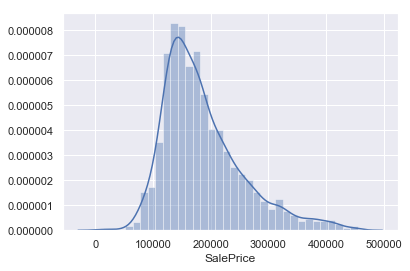

In [668]:
# From the subplots and the PDF of price, we can easily determine that 'Price' is exponentially distributed
# A good transformation in that case is a log transformation
sns.distplot(data_cleaned['SalePrice'])

### Relaxing the assumptions

In [669]:
# Let's transform 'Price' with a log transformation 
log_price = np.log(data_cleaned['SalePrice'])

# Then we add it to our data frame
data_cleaned['log_S.price'] = log_price
data_cleaned

,MS SubClass,MS Zoning,Lot Area,Street,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Yr Sold,Sale Type,Sale Condition,SalePrice,log_S.price
0,60,RL,8795,Pave,Norm,Norm,1Fam,2Story,7,5,2000,2000,2009,WD,Normal,236000,12.37
1,20,RL,10170,Pave,Norm,Norm,1Fam,1Story,6,6,1951,1951,2006,WD,Normal,155000,11.95
2,160,RM,2001,Pave,Norm,Norm,Twnhs,2Story,4,5,1970,1970,2007,WD,Normal,75000,11.23
3,20,RL,10552,Pave,Norm,Norm,1Fam,1Story,5,5,1959,1959,2010,WD,Normal,165500,12.02
4,60,RL,10463,Pave,Norm,Norm,1Fam,2Story,8,5,2005,2005,2006,WD,Normal,239900,12.39
5,120,RL,7892,Pave,Norm,Norm,TwnhsE,1Story,6,5,1993,1993,2008,WD,Normal,153900,11.94
6,160,FV,4017,Pave,Norm,Norm,TwnhsE,2Story,7,5,2006,2007,2008,WD,Normal,171900,12.05
7,20,RL,13618,Pave,Norm,Norm,1Fam,1Story,8,5,2005,2006,2006,New,Partial,320000,12.68
8,20,RL,11194,Pave,PosN,Norm,1Fam,1Story,8,5,2008,2008,2009,WD,Normal,275000,12.52
9,60,RL,10628,Pave,Norm,Norm,1Fam,2Story,7,5,2004,2004,2009,WD,Normal,193000,12.17


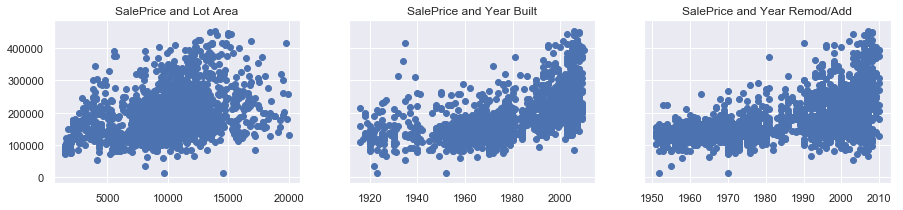

In [670]:
# Let's check the three scatters once again
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3))
ax1.scatter(data_cleaned['Lot Area'],data_cleaned['SalePrice'])
ax1.set_title('SalePrice and Lot Area')
ax2.scatter(data_cleaned['Year Built'],data_cleaned['SalePrice'])
ax2.set_title('SalePrice and Year Built')
ax3.scatter(data_cleaned['Year Remod/Add'],data_cleaned['SalePrice'])
ax3.set_title('SalePrice and Year Remod/Add')


plt.show()

# The data still has some really spread values


In [591]:
# Since we will be using the log price variable, we can drop the old 'SalesPrice' one
data_cleaned = data_cleaned.drop(['SalePrice'],axis=1)

### Multicollinearity

In [592]:
# Let's quickly see the columns of our data frame
data_cleaned.columns.values

array(['MS SubClass', 'MS Zoning', 'Lot Area', 'Street', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Yr Sold',
       'Sale Type', 'Sale Condition', 'log_S.price'], dtype=object)

In [593]:
# sklearn does not have a built-in way to check for multicollinearity
# one of the main reasons is that this is an issue well covered in statistical frameworks and not in ML ones
# surely it is an issue nonetheless, thus we will try to deal with it

# Here's the relevant module
# full documentation: http://www.statsmodels.org/dev/_modules/statsmodels/stats/outliers_influence.html#variance_inflation_factor
from statsmodels.stats.outliers_influence import variance_inflation_factor

# To make this as easy as possible to use, we declare a variable where we put
# all features where we want to check for multicollinearity
# since our categorical data is not yet preprocessed, we will only take the numerical ones
variables = data_cleaned[['Lot Area','Year Built','Year Remod/Add']]

# we create a new data frame which will include all the VIFs (Variance inflation factors)
# note that each variable has its own variance inflation factor as this measure is variable specific (not model specific)
vif = pd.DataFrame()

# here we make use of the variance_inflation_factor, which will basically output the respective VIFs 
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
# Finally, I like to include names so it is easier to explore the result
vif["Features"] = variables.columns

In [594]:
# Let's explore the result
vif

,VIF,Features
0,8.53,Lot Area
1,10112.22,Year Built
2,10092.77,Year Remod/Add


In [595]:
# Since Year built and year Remod has the highest VIF, I will remove it from the model
# This will drive the VIF of other variables down!!! 
# So even if EngineV seems with a high VIF, too, once 'Year' is gone that will no longer be the case
data_no_multicollinearity = data_cleaned.drop(['Year Built','Year Remod/Add'],axis=1)

## Create dummy variables

In [628]:
# To include the categorical data in the regression, let's create dummies
# There is a very convenient method called: 'get_dummies' which does that seemlessly
# It is extremely important that we drop one of the dummies, alternatively we will introduce multicollinearity
data_with_dummies = pd.get_dummies(data_no_multicollinearity, drop_first=True)

In [629]:
# Here's the result
data_with_dummies.head()

,Lot Area,log_S.price,MS SubClass_30,MS SubClass_40,MS SubClass_45,MS SubClass_50,MS SubClass_60,MS SubClass_70,MS SubClass_75,MS SubClass_80,...,Sale Type_ConLI,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
0,8795,12.37,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,10170,11.95,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,2001,11.23,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,10552,12.02,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,10463,12.39,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [633]:
data_with_dummies.columns.values

array(['Lot Area', 'log_S.price', 'MS SubClass_30', 'MS SubClass_40',
       'MS SubClass_45', 'MS SubClass_50', 'MS SubClass_60',
       'MS SubClass_70', 'MS SubClass_75', 'MS SubClass_80',
       'MS SubClass_85', 'MS SubClass_90', 'MS SubClass_120',
       'MS SubClass_150', 'MS SubClass_160', 'MS SubClass_180',
       'MS SubClass_190', 'MS Zoning_C (all)', 'MS Zoning_FV',
       'MS Zoning_RH', 'MS Zoning_RL', 'MS Zoning_RM', 'Street_Pave',
       'Condition 1_Feedr', 'Condition 1_Norm', 'Condition 1_PosA',
       'Condition 1_PosN', 'Condition 1_RRAe', 'Condition 1_RRAn',
       'Condition 1_RRNe', 'Condition 1_RRNn', 'Condition 2_Feedr',
       'Condition 2_Norm', 'Condition 2_PosA', 'Condition 2_PosN',
       'Condition 2_RRAe', 'Condition 2_RRAn', 'Condition 2_RRNn',
       'Bldg Type_2fmCon', 'Bldg Type_Duplex', 'Bldg Type_Twnhs',
       'Bldg Type_TwnhsE', 'House Style_1.5Unf', 'House Style_1Story',
       'House Style_2.5Fin', 'House Style_2.5Unf', 'House Style_2Story',
  

In [634]:
# sklearn does not have a built-in way to check for multicollinearity
# one of the main reasons is that this is an issue well covered in statistical frameworks and not in ML ones
# surely it is an issue nonetheless, thus we will try to deal with it

# Here's the relevant module
# full documentation: http://www.statsmodels.org/dev/_modules/statsmodels/stats/outliers_influence.html#variance_inflation_factor
from statsmodels.stats.outliers_influence import variance_inflation_factor

# To make this as easy as possible to use, we declare a variable where we put
# all features where we want to check for multicollinearity
# since our categorical data is not yet preprocessed, we will only take the numerical ones

variables_dummies = data_with_dummies[['Lot Area', 'log_S.price', 'MS SubClass_30', 'MS SubClass_40',
       'MS SubClass_45', 'MS SubClass_50', 'MS SubClass_60',
       'MS SubClass_70', 'MS SubClass_75', 'MS SubClass_80',
       'MS SubClass_85', 'MS SubClass_90', 'MS SubClass_120',
       'MS SubClass_150', 'MS SubClass_160', 'MS SubClass_180',
       'MS SubClass_190', 'MS Zoning_C (all)', 'MS Zoning_FV',
       'MS Zoning_RH', 'MS Zoning_RL', 'MS Zoning_RM', 'Street_Pave',
       'Condition 1_Feedr', 'Condition 1_Norm', 'Condition 1_PosA',
       'Condition 1_PosN', 'Condition 1_RRAe', 'Condition 1_RRAn',
       'Condition 1_RRNe', 'Condition 1_RRNn', 'Condition 2_Feedr',
       'Condition 2_Norm', 'Condition 2_PosA', 'Condition 2_PosN',
       'Condition 2_RRAe', 'Condition 2_RRAn', 'Condition 2_RRNn',
       'Bldg Type_2fmCon', 'Bldg Type_Duplex', 'Bldg Type_Twnhs',
       'Bldg Type_TwnhsE', 'House Style_1.5Unf', 'House Style_1Story',
       'House Style_2.5Fin', 'House Style_2.5Unf', 'House Style_2Story',
       'House Style_SFoyer', 'House Style_SLvl', 'Overall Qual_2',
       'Overall Qual_3', 'Overall Qual_4', 'Overall Qual_5',
       'Overall Qual_6', 'Overall Qual_7', 'Overall Qual_8',
       'Overall Qual_9', 'Overall Qual_10', 'Overall Cond_2',
       'Overall Cond_3', 'Overall Cond_4', 'Overall Cond_5',
       'Overall Cond_6', 'Overall Cond_7', 'Overall Cond_8',
       'Overall Cond_9', 'Yr Sold_2007', 'Yr Sold_2008', 'Yr Sold_2009',
       'Yr Sold_2010', 'Sale Type_CWD', 'Sale Type_Con',
       'Sale Type_ConLD', 'Sale Type_ConLI', 'Sale Type_New',
       'Sale Type_Oth', 'Sale Type_VWD', 'Sale Type_WD ',
       'Sale Condition_AdjLand', 'Sale Condition_Alloca',
       'Sale Condition_Family', 'Sale Condition_Normal',
       'Sale Condition_Partial']]

# we create a new data frame which will include all the VIFs (Variance inflation factors)
# note that each variable has its own variance inflation factor as this measure is variable specific (not model specific)
vif_dummies = pd.DataFrame()

# here we make use of the variance_inflation_factor, which will basically output the respective VIFs 
vif_dummies["VIF"] = [variance_inflation_factor(variables_dummies.values, i) for i in range(variables_dummies.shape[1])]
# Finally, I like to include names so it is easier to explore the result
vif_dummies["Features"] = variables_dummies.columns

In [635]:
vif_dummies

,VIF,Features
0,21.01,Lot Area
1,4357.67,log_S.price
2,1.41,MS SubClass_30
3,1.09,MS SubClass_40
4,6.85,MS SubClass_45
5,13.11,MS SubClass_50
6,35.65,MS SubClass_60
7,3.79,MS SubClass_70
8,2.75,MS SubClass_75
9,16.75,MS SubClass_80


### Rearrange a bit

In [636]:
# To make our data frame more organized, we prefer to place the dependent variable in the beginning of the df
# Since each problem is different, that must be done manually
# We can display all possible features and then choose the desired order
data_with_dummies.columns.values

array(['Lot Area', 'log_S.price', 'MS SubClass_30', 'MS SubClass_40',
       'MS SubClass_45', 'MS SubClass_50', 'MS SubClass_60',
       'MS SubClass_70', 'MS SubClass_75', 'MS SubClass_80',
       'MS SubClass_85', 'MS SubClass_90', 'MS SubClass_120',
       'MS SubClass_150', 'MS SubClass_160', 'MS SubClass_180',
       'MS SubClass_190', 'MS Zoning_C (all)', 'MS Zoning_FV',
       'MS Zoning_RH', 'MS Zoning_RL', 'MS Zoning_RM', 'Street_Pave',
       'Condition 1_Feedr', 'Condition 1_Norm', 'Condition 1_PosA',
       'Condition 1_PosN', 'Condition 1_RRAe', 'Condition 1_RRAn',
       'Condition 1_RRNe', 'Condition 1_RRNn', 'Condition 2_Feedr',
       'Condition 2_Norm', 'Condition 2_PosA', 'Condition 2_PosN',
       'Condition 2_RRAe', 'Condition 2_RRAn', 'Condition 2_RRNn',
       'Bldg Type_2fmCon', 'Bldg Type_Duplex', 'Bldg Type_Twnhs',
       'Bldg Type_TwnhsE', 'House Style_1.5Unf', 'House Style_1Story',
       'House Style_2.5Fin', 'House Style_2.5Unf', 'House Style_2Story',
  

In [637]:
# To make the code a bit more parametrized, let's declare a new variable that will contain the preferred order
# If you want a different order, just specify it here
# Conventionally, the most intuitive order is: dependent variable, indepedendent numerical variables, dummies
cols = ['log_S.price', 'Lot Area', 'MS SubClass_30', 'MS SubClass_40',
       'MS SubClass_45', 'MS SubClass_50', 'MS SubClass_60',
       'MS SubClass_70', 'MS SubClass_75', 'MS SubClass_80',
       'MS SubClass_85', 'MS SubClass_90', 'MS SubClass_120',
       'MS SubClass_150', 'MS SubClass_160', 'MS SubClass_180',
       'MS SubClass_190', 'MS Zoning_C (all)', 'MS Zoning_FV',
       'MS Zoning_RH', 'MS Zoning_RL', 'MS Zoning_RM', 'Street_Pave',
       'Condition 1_Feedr', 'Condition 1_Norm', 'Condition 1_PosA',
       'Condition 1_PosN', 'Condition 1_RRAe', 'Condition 1_RRAn',
       'Condition 1_RRNe', 'Condition 1_RRNn', 'Condition 2_Feedr',
       'Condition 2_Norm', 'Condition 2_PosA', 'Condition 2_PosN',
       'Condition 2_RRAe', 'Condition 2_RRAn', 'Condition 2_RRNn',
       'Bldg Type_2fmCon', 'Bldg Type_Duplex', 'Bldg Type_Twnhs',
       'Bldg Type_TwnhsE', 'House Style_1.5Unf', 'House Style_1Story',
       'House Style_2.5Fin', 'House Style_2.5Unf', 'House Style_2Story',
       'House Style_SFoyer', 'House Style_SLvl', 'Overall Qual_2',
       'Overall Qual_3', 'Overall Qual_4', 'Overall Qual_5',
       'Overall Qual_6', 'Overall Qual_7', 'Overall Qual_8',
       'Overall Qual_9', 'Overall Qual_10', 'Overall Cond_2',
       'Overall Cond_3', 'Overall Cond_4', 'Overall Cond_5',
       'Overall Cond_6', 'Overall Cond_7', 'Overall Cond_8',
       'Overall Cond_9', 'Yr Sold_2007', 'Yr Sold_2008', 'Yr Sold_2009',
       'Yr Sold_2010', 'Sale Type_CWD', 'Sale Type_Con',
       'Sale Type_ConLD', 'Sale Type_ConLI', 'Sale Type_New',
       'Sale Type_Oth', 'Sale Type_VWD', 'Sale Type_WD ',
       'Sale Condition_AdjLand', 'Sale Condition_Alloca',
       'Sale Condition_Family', 'Sale Condition_Normal',
       'Sale Condition_Partial']

In [638]:
# To implement the reordering, we will create a new df, which is equal to the old one but with the new order of features
data_preprocessed = data_with_dummies[cols]
data_preprocessed.head()

,log_S.price,Lot Area,MS SubClass_30,MS SubClass_40,MS SubClass_45,MS SubClass_50,MS SubClass_60,MS SubClass_70,MS SubClass_75,MS SubClass_80,...,Sale Type_ConLI,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
0,12.37,8795,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,11.95,10170,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,11.23,2001,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,12.02,10552,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,12.39,10463,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0


## Linear regression model

### Declare the inputs and the targets

In [604]:
# The target(s) (dependent variable) is 'log price'
targets = data_preprocessed['log_S.price']

# The inputs are everything BUT the dependent variable, so we can simply drop it
inputs = data_preprocessed.drop(['log_S.price'],axis=1)

### Scale the data

In [605]:
# Import the scaling module
from sklearn.preprocessing import StandardScaler

# Create a scaler object
scaler = StandardScaler()
# Fit the inputs (calculate the mean and standard deviation feature-wise)
scaler.fit(inputs)

C:\Users\bigbr\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


StandardScaler(copy=True, with_mean=True, with_std=True)

In [606]:
# Scale the features and store them in a new variable (the actual scaling procedure)
inputs_scaled = scaler.transform(inputs)

C:\Users\bigbr\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  


### Train Test Split

In [607]:
# Import the module for the split
from sklearn.model_selection import train_test_split

# Split the variables with an 80-20 split and some random state
# To have the same split as mine, use random_state = 365
x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, targets, test_size=0.2, random_state=365)

### Create the regression

In [608]:
# Create a linear regression object
reg = LinearRegression()
# Fit the regression with the scaled TRAIN inputs and targets
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [609]:
# Let's check the outputs of the regression
# I'll store them in y_hat as this is the 'theoretical' name of the predictions
y_hat = reg.predict(x_train)

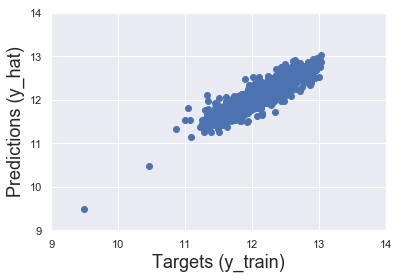

In [610]:
# The simplest way to compare the targets (y_train) and the predictions (y_hat) is to plot them on a scatter plot
# The closer the points to the 45-degree line, the better the prediction
plt.scatter(y_train, y_hat)
# Let's also name the axes
plt.xlabel('Targets (y_train)',size=18)
plt.ylabel('Predictions (y_hat)',size=18)
# Sometimes the plot will have different scales of the x-axis and the y-axis
# This is an issue as we won't be able to interpret the '45-degree line'
# We want the x-axis and the y-axis to be the same
plt.xlim(9,14)
plt.ylim(9,14)
plt.show()

Text(0.5, 1.0, 'Residuals PDF')

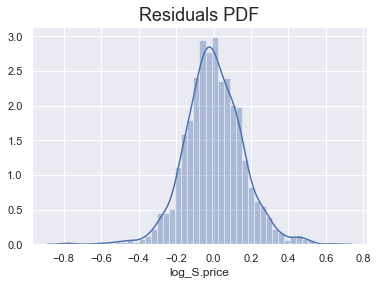

In [611]:
# Another useful check of our model is a residual plot
# We can plot the PDF of the residuals and check for anomalies
sns.distplot(y_train - y_hat)

# Include a title
plt.title("Residuals PDF", size=18)

# In the best case scenario this plot should be normally distributed
# In our case we notice that there are many negative residuals (far away from the mean)
# Given the definition of the residuals (y_train - y_hat), negative values imply
# that y_hat (predictions) are much higher than y_train (the targets)
# This is food for thought to improve our model

In [612]:
# Find the R-squared of the model
reg.score(x_train,y_train)

# Note that this is NOT the adjusted R-squared
# in other words... find the Adjusted R-squared to have the appropriate measure :)

0.8094004718912755

### Finding the weights and bias

In [613]:
# Obtain the bias (intercept) of the regression
reg.intercept_

33544126625.795517

In [614]:
# Obtain the weights (coefficients) of the regression
reg.coef_

# Note that they are barely interpretable if at all

array([ 9.02034656e-02, -2.89190119e-02, -4.03914565e-03, -1.26638694e-02,
        1.04877010e-02, -2.52850431e-02, -2.26664927e-02, -1.26651009e-02,
       -1.70696527e-02,  3.96652300e-03, -2.35669574e+12,  3.72386731e-02,
        9.18155512e+11, -1.59506050e-02,  1.23500687e-02,  4.11958989e+12,
        4.95238158e+10,  5.11245808e+11,  1.56249548e+11,  8.18016390e+11,
        6.66953433e+11,  1.32416034e-02,  1.32900784e-02,  3.11251218e-02,
        9.89205985e-03,  1.81552609e-02, -3.00027559e-03,  4.27059800e-03,
        2.72986793e-03,  3.50410540e-03,  4.27454434e+12,  6.28073042e+12,
        2.47042247e+12,  5.91729035e+12,  1.74729647e+12,  1.74729647e+12,
       -1.05467023e+11, -4.11958989e+12,  2.35669574e+12, -3.41596601e-02,
       -1.92359660e-02,  6.01772860e-03,  1.49860406e-02,  1.48471624e-02,
        1.43592158e-02,  8.38014093e-02,  3.54793150e-03,  2.04705438e-02,
       -7.00194557e+10, -1.63834077e+11, -5.02656466e+11, -9.77233017e+11,
       -9.55482111e+11, -

In [615]:
# Create a regression summary where we can compare them with one-another
reg_summary = pd.DataFrame(inputs.columns.values, columns=['Features'])
reg_summary['Weights'] = reg.coef_
reg_summary

,Features,Weights
0,Lot Area,0.09
1,MS SubClass_30,-0.03
2,MS SubClass_40,-0.00
3,MS SubClass_45,-0.01
4,MS SubClass_50,0.01
5,MS SubClass_60,-0.03
6,MS SubClass_70,-0.02
7,MS SubClass_75,-0.01
8,MS SubClass_80,-0.02
9,MS SubClass_85,0.00


In [616]:
# Check the different categories in the 'Brand' variable
data_cleaned['MS SubClass'].unique()

# In this way we can see which 'Brand' is actually the benchmark

array([60, 20, 160, 120, 90, 85, 45, 70, 50, 30, 80, 180, 75, 190, 150,
       40], dtype=object)

## Testing

In [617]:
# Once we have trained and fine-tuned our model, we can proceed to testing it
# Testing is done on a dataset that the algorithm has never seen
# Luckily we have prepared such a dataset
# Our test inputs are 'x_test', while the outputs: 'y_test' 
# We SHOULD NOT TRAIN THE MODEL ON THEM, we just feed them and find the predictions
# If the predictions are far off, we will know that our model overfitted


y_hat_test = reg.predict(x_test)

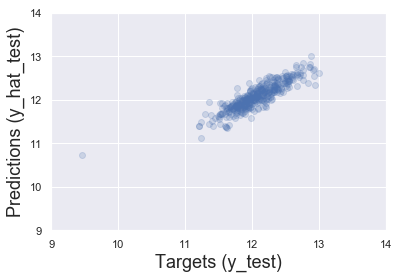

In [618]:
# Create a scatter plot with the test targets and the test predictions
# You can include the argument 'alpha' which will introduce opacity to the graph
plt.scatter(y_test, y_hat_test, alpha=0.2)

plt.xlabel('Targets (y_test)',size=18)
plt.ylabel('Predictions (y_hat_test)',size=18)
plt.xlim(9,14)
plt.ylim(9,14)
plt.show()

In [619]:
# Finally, let's manually check these predictions
# To obtain the actual prices, we take the exponential of the log_price
df_pf = pd.DataFrame(np.exp(y_hat_test), columns=['Prediction'])
df_pf.head()

,Prediction
0,246356.64
1,85942.60
2,185574.25
3,89278.94
4,220159.76


In [620]:
# We can also include the test targets in that data frame (so we can manually compare them)
df_pf['Target'] = np.exp(y_test)
df_pf

# Note that we have a lot of missing values
# There is no reason to have ANY missing values, though
# This suggests that something is wrong with the data frame / indexing

,Prediction,Target
0,246356.64,nan
1,85942.60,155000.00
2,185574.25,nan
3,89278.94,nan
4,220159.76,nan
5,136917.41,nan
6,253371.40,nan
7,134498.85,nan
8,129204.25,275000.00
9,137537.21,nan


In [621]:
# After displaying y_test, we find what the issue is
# The old indexes are preserved (recall earlier in that code we made a note on that)
# The code was: data_cleaned = data_4.reset_index(drop=True)

# Therefore, to get a proper result, we must reset the index and drop the old indexing
y_test = y_test.reset_index(drop=True)

# Check the result
y_test.head()

0   12.30
1   11.61
2   12.01
3   11.20
4   12.51
Name: log_S.price, dtype: float64

In [622]:
# Let's overwrite the 'Target' column with the appropriate values
# Again, we need the exponential of the test log price
df_pf['Target'] = np.exp(y_test)
df_pf

,Prediction,Target
0,246356.64,220000.00
1,85942.60,110000.00
2,185574.25,163990.00
3,89278.94,73000.00
4,220159.76,271000.00
5,136917.41,190000.00
6,253371.40,236500.00
7,134498.85,113500.00
8,129204.25,123900.00
9,137537.21,200000.00


In [623]:
# Additionally, we can calculate the difference between the targets and the predictions
# Note that this is actually the residual (we already plotted the residuals)
df_pf['Residual'] = df_pf['Target'] - df_pf['Prediction']

# Since OLS is basically an algorithm which minimizes the total sum of squared errors (residuals),
# this comparison makes a lot of sense

In [624]:
# Finally, it makes sense to see how far off we are from the result percentage-wise
# Here, we take the absolute difference in %, so we can easily order the data frame
df_pf['Difference%'] = np.absolute(df_pf['Residual']/df_pf['Target']*100)
df_pf

,Prediction,Target,Residual,Difference%
0,246356.64,220000.00,-26356.64,11.98
1,85942.60,110000.00,24057.40,21.87
2,185574.25,163990.00,-21584.25,13.16
3,89278.94,73000.00,-16278.94,22.30
4,220159.76,271000.00,50840.24,18.76
5,136917.41,190000.00,53082.59,27.94
6,253371.40,236500.00,-16871.40,7.13
7,134498.85,113500.00,-20998.85,18.50
8,129204.25,123900.00,-5304.25,4.28
9,137537.21,200000.00,62462.79,31.23


In [625]:
# Exploring the descriptives here gives us additional insights
df_pf.describe()

,Prediction,Target,Residual,Difference%
count,394.00,394.00,394.00,394.00
mean,inf,184267.27,-inf,inf
std,nan,67850.12,nan,nan
min,0.00,12789.00,-inf,0.02
25%,141043.95,137000.00,-18571.64,5.77
50%,172721.15,169992.50,-1168.65,10.70
75%,215125.47,218875.00,18512.54,17.97
max,inf,440000.00,189233.80,inf


In [626]:
# Sometimes it is useful to check these outputs manually
# To see all rows, we use the relevant pandas syntax
pd.options.display.max_rows = 999
# Moreover, to make the dataset clear, we can display the result with only 2 digits after the dot 
pd.set_option('display.float_format', lambda x: '%.2f' % x)
# Finally, we sort by difference in % and manually check the model
df_pf.sort_values(by=['Difference%'])

,Prediction,Target,Residual,Difference%
347,178029.83,178000.00,-29.83,0.02
87,173058.70,173000.00,-58.70,0.03
152,280148.63,280000.00,-148.63,0.05
110,144102.57,144000.00,-102.57,0.07
313,137101.38,137000.00,-101.38,0.07
137,194195.47,194000.00,-195.47,0.10
33,222809.33,222500.00,-309.33,0.14
271,117828.65,118000.00,171.35,0.15
372,176471.97,177000.00,528.03,0.30
314,109614.08,110000.00,385.92,0.35
